In [25]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance
import scipy.stats
import pylab
import ccxt
import calendar
from datetime import datetime, date, timedelta

#import statsmodels.graphics.tsaplots as sgt
#from statsmodels.tsa.arima_model import ARMA
#from scipy.stats.distributions import chi2
#import statsmodels.tsa.stattools as sts 
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [26]:


binance = ccxt.binance()

def min_ohlcv(dt, pair, limit):
    # UTC native object
    since = calendar.timegm(dt.utctimetuple())*1000
    ohlcv1 = binance.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv2 = binance.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv = ohlcv1 + ohlcv2
    return ohlcv



In [27]:
def ohlcv(dt, pair, period='1d'):
    ohlcv = []
    limit = 1000
    if period == '1m':
        limit = 720
    elif period == '1d':
        limit = 365
    elif period == '1h':
        limit = 24
    elif period == '5m':
        limit = 288
    for i in dt:
        start_dt = datetime.strptime(i, "%Y%m%d")
        since = calendar.timegm(start_dt.utctimetuple())*1000
        if period == '1m':
            ohlcv.extend(min_ohlcv(start_dt, pair, limit))
        else:
            ohlcv.extend(binance.fetch_ohlcv(symbol=pair, timeframe=period, since=since, limit=limit))
    df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
    df['Open'] = df['Open'].astype(np.float64)
    df['High'] = df['High'].astype(np.float64)
    df['Low'] = df['Low'].astype(np.float64)
    df['Close'] = df['Close'].astype(np.float64)
    df['Volume'] = df['Volume'].astype(np.float64)
    df.set_index('Time', inplace=True)
    return df


In [28]:
dt = ['20201001', '20211001']
df = ohlcv(dt, 'BTC/USDT', '1d')

In [29]:
BTC=df.iloc[:,3]

In [30]:
BTC

Time
2020-09-30 19:00:00    10619.13
2020-10-01 19:00:00    10570.40
2020-10-02 19:00:00    10542.06
2020-10-03 19:00:00    10666.63
2020-10-04 19:00:00    10792.21
                         ...   
2021-09-30 19:00:00    48141.61
2021-10-01 19:00:00    47634.90
2021-10-02 19:00:00    48200.01
2021-10-03 19:00:00    49224.94
2021-10-04 19:00:00    49190.49
Name: Close, Length: 370, dtype: float64

In [23]:
def get_tickets_close(tickets):
    info = yfinance.download(tickers = tickets, interval ='1d',start='2016-01-01', end ='2021-09-09', groub_by = 'ticker',auto_adjust = True, treads = True)['Close']
    return info

In [ ]:
BTC = ["BTC-USD"]
BTC = get_tickets_close(BTC)
BTC.tail()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Juan Pablo\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Juan Pablo\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Juan Pablo\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\Juan Pablo\Anaconda3\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "C:\Users\Juan Pablo\Anaconda3\lib\site-packages\yfinance\multi.py", line 182, in _download_one
    rounding=rounding, many=True)
  File "C:\Users\Juan Pablo\Anaconda3\lib\site-packages\yfinance\base.py", line 156, in history
    data = data.json()
  File "C:\Users\Juan Pablo\Anaconda3\lib\site-packages\requests\models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs

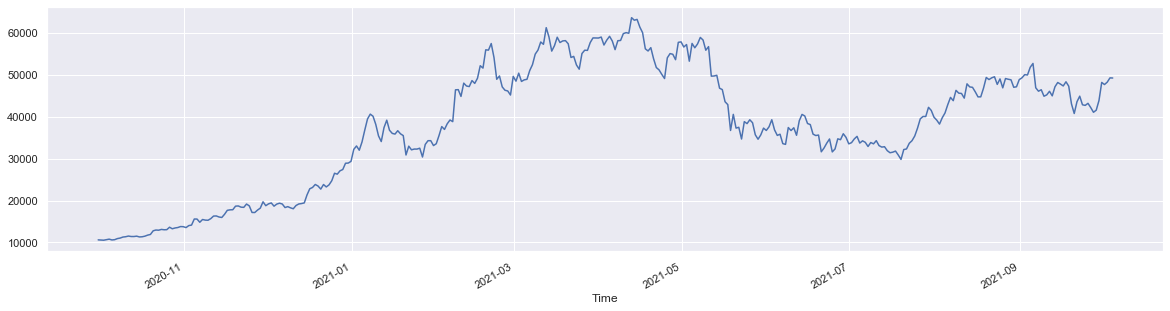

In [31]:
BTC.plot(figsize=(20,5))
plt.show()

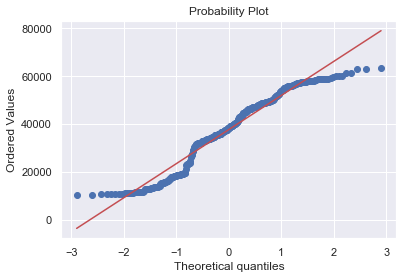

In [32]:
scipy.stats.probplot(BTC, plot = pylab)
pylab.show()

# AR analisis

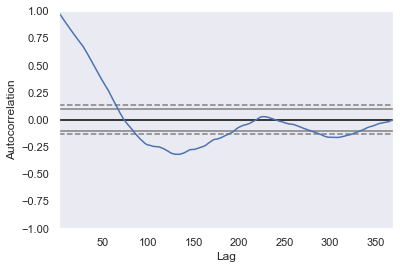

In [43]:
pd.plotting.autocorrelation_plot(BTC, ax = None)

## The ACF

In [47]:
from matplotlib import pyplot

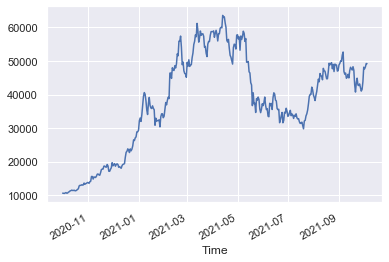

In [49]:
BTC.plot()
pyplot.show()

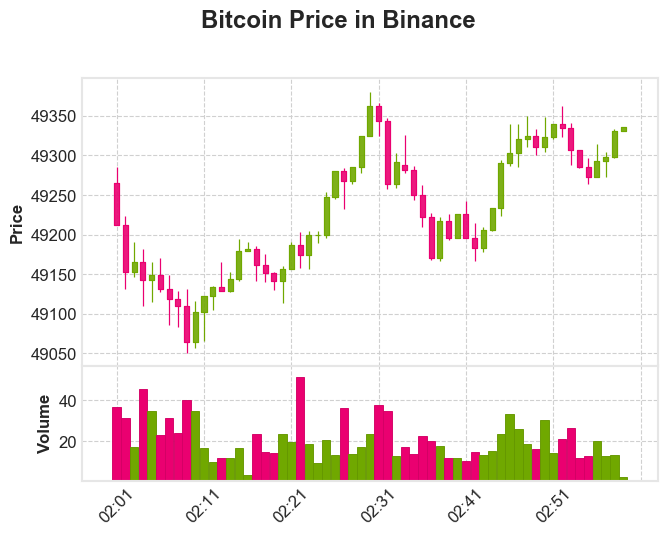

In [68]:
from binance.client import Client

import matplotlib.animation as animation
import mplfinance as mpf
import pandas as pd
import numpy as np

api_key    = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
api_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxx'

crypto = 'BTCUSDT'
kline_interval = Client.KLINE_INTERVAL_1MINUTE

client = Client(api_key, api_secret)
klines = client.get_historical_klines(crypto, kline_interval, "1 hour ago UTC")

df = pd.DataFrame(klines,  columns=['Date',
                                    'Open',
                                    'High',
                                    'Low',
                                    'Close',
                                    'Volume',
                                    'Close time',
                                    'Quote asset volume',
                                    'Number of trades',
                                    'Taker buy base asset volume',
                                    'Taker buy quote asset volume',
                                    'Ignore'])

df = df.drop(df.columns[[6, 7, 8, 9, 10, 11]], axis=1)
df['Date'] = pd.to_datetime(df['Date'], unit='ms')
df.set_index('Date', inplace=True, drop=True)

df['Open']   = df['Open'].astype(float)
df['High']   = df['High'].astype(float)
df['Low']    = df['Low'].astype(float)
df['Close']  = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)

pkwargs=dict(type='candle', style='binance')
fig, axes = mpf.plot(df, title='Bitcoin Price in Binance', volume=True, returnfig=True, **pkwargs)

ax1 = axes[0]
ax2 = axes[2]

def animate(ival):

    candle = client.get_klines(symbol=crypto, interval=kline_interval, limit=1)

    c_open  = float(candle[0][1])
    c_high  = float(candle[0][2])
    c_low   = float(candle[0][3])
    c_close = float(candle[0][4])
    c_vol   = float(candle[0][5])
    
    df2 = pd.DataFrame({'Date':[candle[0][0]], 'Open':[c_open],'High':[c_high],'Low':[c_low],'Close':[c_close],'Volume':[c_vol]})
    df2['Date'] = pd.to_datetime(df2['Date'], unit='ms')
    df2.set_index('Date', inplace=True, drop=True)

    global df

    if df.last_valid_index() != df2.last_valid_index():
        data = pd.concat([df.iloc[1:], df2], ignore_index = False) 
        df = data
    else:
        data = df    
        data.iloc[-1, data.columns.get_loc('Open')]   = c_open
        data.iloc[-1, data.columns.get_loc('High')]   = c_high
        data.iloc[-1, data.columns.get_loc('Low')]    = c_low
        data.iloc[-1, data.columns.get_loc('Close')]  = c_close
        data.iloc[-1, data.columns.get_loc('Volume')] = c_vol
    
    ax1.clear()
    ax2.clear()

    mpf.plot(data, ax=ax1,volume=ax2,**pkwargs)

ani = animation.FuncAnimation(fig, animate, interval=250)

mpf.show()

In [71]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-05 02:01:00,49265.61,49285.00,49211.81,49211.81,36.84349
2021-10-05 02:02:00,49211.82,49223.34,49130.58,49152.44,31.37212
2021-10-05 02:03:00,49152.44,49191.04,49145.78,49165.65,17.31344
2021-10-05 02:04:00,49165.65,49182.16,49109.29,49141.96,45.30462
2021-10-05 02:05:00,49141.96,49165.81,49114.24,49149.09,34.72251


Codigo obtenido de : http://acodigo.blogspot.com/2021/01/python-binance-api.html

## The Lag Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


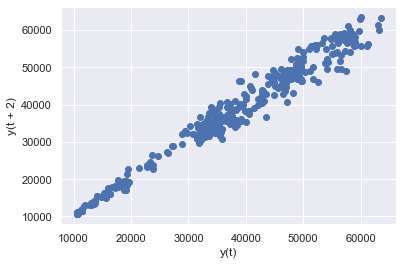

In [53]:
pd.plotting.lag_plot(BTC, lag=2)

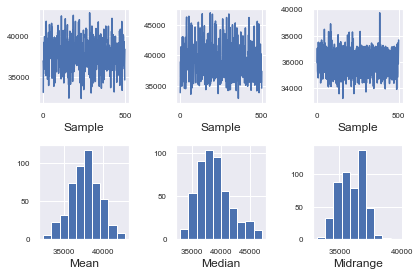

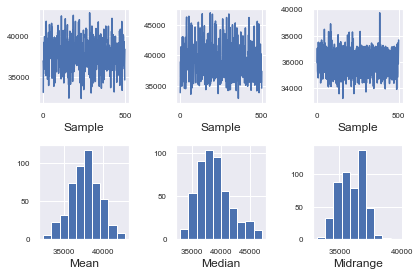

In [50]:
pd.plotting.bootstrap_plot(BTC)

## THE PACF

In [46]:
pd.plot_pacf(BTC, lags = 50, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for BTC prices", size = 20)
plt.show()

AttributeError: module 'pandas' has no attribute 'plot_pacf'

# The AR(1) model

In [13]:
model_ar = ARMA(BTC, order=(1,0))

NameError: name 'ARMA' is not defined

In [9]:
results_ar = model_ar.fit()

In [10]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2075
Model:                     ARMA(1, 0)   Log Likelihood              -16687.888
Method:                       css-mle   S.D. of innovations            751.329
Date:                Sat, 02 Oct 2021   AIC                          33381.775
Time:                        18:43:51   BIC                          33398.688
Sample:                             0   HQIC                         33387.974
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.079e+04   1.73e+04      0.622      0.534   -2.32e+04    4.48e+04
ar.L1.Close     0.9993      0.001   1089.165      0.000       0.997       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
def LLR_test(mod_1, mod_2, DF=1):
    "mod_1 = place the first model, mod_2= place your second model, DF = degrees of freedom, 1 degree of freedom by default"
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [12]:
model_ar2 = ARMA(BTC, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2075
Model:                     ARMA(2, 0)   Log Likelihood              -16684.344
Method:                       css-mle   S.D. of innovations            750.037
Date:                Sat, 02 Oct 2021   AIC                          33376.688
Time:                        18:43:51   BIC                          33399.239
Sample:                             0   HQIC                         33384.953
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.079e+04   1.88e+04      0.574      0.566   -2.61e+04    4.76e+04
ar.L1.Close     0.9409      0.021     44.713      0.000       0.900       0.982
ar.L2.Close     0.0584      0.021      2.774      0.006       0.017       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
AR.2          -17.1065           +0.0000j           17.1065            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model_ar_2 = ARMA(BTC, order = (2,0))
results_model_ar_2 = model_ar_2.fit()
print(results_model_ar_2 .summary())
print ("LLR test: " + str(LLR_test(model_ar, model_ar_2)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2075
Model:                     ARMA(2, 0)   Log Likelihood              -16684.344
Method:                       css-mle   S.D. of innovations            750.037
Date:                Sat, 02 Oct 2021   AIC                          33376.688
Time:                        18:43:51   BIC                          33399.239
Sample:                             0   HQIC                         33384.953
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.079e+04   1.88e+04      0.574      0.566   -2.61e+04    4.76e+04
ar.L1.Close     0.9409      0.021     44.713      0.000       0.900       0.982
ar.L2.Close     0.0584      0.021      2.774    

**Tomando un 5% de nivel de significancia, el modelo 2 es mejor que el 1**

In [14]:
model_ar_3 = ARMA(BTC, order = (3,0))
results_model_ar_3 = model_ar_3.fit()
print(results_model_ar_3 .summary())
print ("LLR test: " + str(LLR_test(model_ar2, model_ar_3)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2075
Model:                     ARMA(3, 0)   Log Likelihood              -16680.525
Method:                       css-mle   S.D. of innovations            748.665
Date:                Sat, 02 Oct 2021   AIC                          33371.050
Time:                        18:43:52   BIC                          33399.239
Sample:                             0   HQIC                         33381.381
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.079e+04   1.73e+04      0.626      0.532    -2.3e+04    4.46e+04
ar.L1.Close     0.9445      0.021     44.250      0.000       0.903       0.986
ar.L2.Close     0.1154      0.030      3.887    

**Tomando un 5% de nivel de significancia, el modelo 3 es mejor que el 2**

In [15]:
model_ar_4 = ARMA(BTC, order = (4,0))
results_model_ar_4 = model_ar_4.fit()
print(results_model_ar_4 .summary())
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2075
Model:                     ARMA(4, 0)   Log Likelihood              -16679.734
Method:                       css-mle   S.D. of innovations            748.386
Date:                Sat, 02 Oct 2021   AIC                          33371.467
Time:                        18:43:53   BIC                          33405.294
Sample:                             0   HQIC                         33383.865
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.079e+04   1.64e+04      0.658      0.510   -2.13e+04    4.29e+04
ar.L1.Close     0.9428      0.022     43.847      0.000       0.901       0.985
ar.L2.Close     0.1188      0.030      3.976    

**Tomando un nivel de significancia de 5% el modelo 4 NO es mejor que el modelo 3**

In [16]:
model_ar_5 = ARMA(BTC, order = (5,0))
results_model_ar_5 = model_ar_5.fit()
print(results_model_ar_5 .summary())
print ("LLR test: " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2075
Model:                     ARMA(5, 0)   Log Likelihood              -16678.843
Method:                       css-mle   S.D. of innovations            748.070
Date:                Sat, 02 Oct 2021   AIC                          33371.685
Time:                        18:43:54   BIC                          33411.149
Sample:                             0   HQIC                         33386.149
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.079e+04   1.55e+04      0.695      0.487   -1.97e+04    4.12e+04
ar.L1.Close     0.9420      0.022     43.610      0.000       0.900       0.984
ar.L2.Close     0.1177      0.030      3.930    

**Tomando un nivel de significancia de 5% el modelo 4 NO es mejor que el modelo 3**

In [17]:
sts.adfuller(BTC)

(-0.26870830733612006,
 0.929820736352078,
 26,
 2048,
 {'1%': -3.433547028919612,
  '5%': -2.8629522934224085,
  '10%': -2.5675218415927885},
 32883.64184587869)

El p value de la prueba de dickey fuller es de: .929, por lo que podemos deducir que nuestra información no viene de un proceso estacionario, a un nivel de significancia del 5%, esto viene de un proceso no estacionario.

## Usando retornos en vez de precios

In [18]:
BTC_returns = pd.DataFrame(BTC.pct_change(1).mul(100))
BTC_returns = BTC_returns[1:]
BTC_returns

,Close
Date,
2016-01-02,-0.206299
2016-01-03,-0.790656
2016-01-04,0.716265
2016-01-05,-0.261149
2016-01-06,-0.660936
...,...
2021-09-05,3.621581
2021-09-06,1.700613
2021-09-07,-11.062161


In [19]:
sts.adfuller(BTC_returns)

(-31.68205835408799,
 0.0,
 1,
 2072,
 {'1%': -3.4335099516667325,
  '5%': -2.8629359231480236,
  '10%': -2.5675131253354153},
 11474.059472809327)

El p value de la prueba de dickey fuller es de: 0.0, por lo que podemos deducir que nuestra información viene de un proceso estacionario, a un nivel de significancia del 5%.

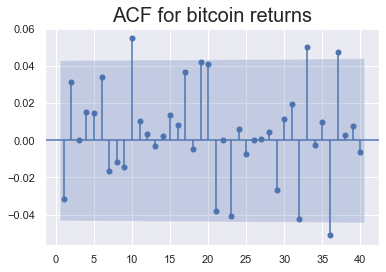

In [20]:
sgt.plot_acf(BTC_returns, zero=False, lags=40)
plt.title("ACF for bitcoin returns", size= 20)
plt.show()

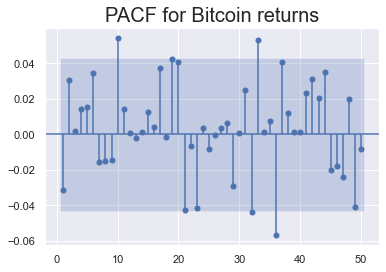

In [21]:
sgt.plot_pacf(BTC_returns, lags = 50, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Bitcoin returns", size = 20)
plt.show()

# Ar for models

In [22]:
model_ret_ar = ARMA(BTC_returns, order=(1,0))
results_ret_ar = model_ret_ar.fit()
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2074
Model:                     ARMA(1, 0)   Log Likelihood               -5814.408
Method:                       css-mle   S.D. of innovations              3.993
Date:                Sat, 02 Oct 2021   AIC                          11634.815
Time:                        18:43:56   BIC                          11651.727
Sample:                             0   HQIC                         11641.013
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3060      0.085      3.599      0.000       0.139       0.473
ar.L1.Close    -0.0314      0.022     -1.433      0.152      -0.074       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.8074           +0.0000j           31.8074            0.5000
-----------------------------------------------------------------------------
"""

In [23]:
model_ret_ar2 = ARMA(BTC_returns, order = (2,0))
results_model_ret_ar2 = model_ret_ar2.fit()
print(results_model_ret_ar2 .summary())
print ("LLR test: " + str(LLR_test(model_ret_ar, model_ret_ar2)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2074
Model:                     ARMA(2, 0)   Log Likelihood               -5813.438
Method:                       css-mle   S.D. of innovations              3.991
Date:                Sat, 02 Oct 2021   AIC                          11634.877
Time:                        18:43:56   BIC                          11657.426
Sample:                             0   HQIC                         11643.141
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3059      0.088      3.491      0.000       0.134       0.478
ar.L1.Close    -0.0305      0.022     -1.389      0.165      -0.073       0.013
ar.L2.Close     0.0306      0.022      1.393    

In [24]:
model_ret_ar3 = ARMA(BTC_returns, order = (3,0))
results_model_ret_ar3 = model_ret_ar3.fit()
print(results_model_ret_ar3 .summary())
print ("LLR test: " + str(LLR_test(model_ret_ar2, model_ret_ar3)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2074
Model:                     ARMA(3, 0)   Log Likelihood               -5813.434
Method:                       css-mle   S.D. of innovations              3.991
Date:                Sat, 02 Oct 2021   AIC                          11636.869
Time:                        18:43:57   BIC                          11665.055
Sample:                             0   HQIC                         11647.199
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3059      0.088      3.484      0.000       0.134       0.478
ar.L1.Close    -0.0305      0.022     -1.391      0.164      -0.074       0.012
ar.L2.Close     0.0306      0.022      1.395    

In [25]:
model_ret_ar4 = ARMA(BTC_returns, order = (4,0))
results_model_ret_ar4 = model_ret_ar4.fit()
print(results_model_ret_ar4 .summary())
print ("LLR test: " + str(LLR_test(model_ret_ar3, model_ret_ar4)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2074
Model:                     ARMA(4, 0)   Log Likelihood               -5813.228
Method:                       css-mle   S.D. of innovations              3.991
Date:                Sat, 02 Oct 2021   AIC                          11638.457
Time:                        18:43:57   BIC                          11672.280
Sample:                             0   HQIC                         11650.853
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3058      0.089      3.434      0.001       0.131       0.480
ar.L1.Close    -0.0306      0.022     -1.392      0.164      -0.074       0.012
ar.L2.Close     0.0302      0.022      1.374    

In [26]:
model_ret_ar9 = ARMA(BTC_returns, order = (9,0))
results_model_ret_ar9 = model_ret_ar9.fit()
print(results_model_ret_ar9 .summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2074
Model:                     ARMA(9, 0)   Log Likelihood               -5811.060
Method:                       css-mle   S.D. of innovations              3.987
Date:                Sat, 02 Oct 2021   AIC                          11644.121
Time:                        18:43:59   BIC                          11706.130
Sample:                             0   HQIC                         11666.848
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3058      0.089      3.417      0.001       0.130       0.481
ar.L1.Close    -0.0312      0.022     -1.423      0.155      -0.074       0.012
ar.L2.Close     0.0302      0.022      1.374    

In [27]:
model_ret_ar10 = ARMA(BTC_returns, order = (10,0))
results_model_ret_ar10 = model_ret_ar10.fit()
print(results_model_ret_ar10.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2074
Model:                    ARMA(10, 0)   Log Likelihood               -5808.021
Method:                       css-mle   S.D. of innovations              3.981
Date:                Sat, 02 Oct 2021   AIC                          11640.041
Time:                        18:44:02   BIC                          11707.688
Sample:                             0   HQIC                         11664.834
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3057      0.094      3.237      0.001       0.121       0.491
ar.L1.Close     -0.0304      0.022     -1.389      0.165      -0.073       0.013
ar.L2.Close      0.0310      0.022      1.41

In [28]:
model_ret_ar10 = ARMA(BTC_returns, order = (10,0))
results_model_ret_ar10 = model_ret_ar10.fit()
print(results_model_ret_ar10 .summary())
print ("LLR test: " + str(LLR_test(model_ret_ar, model_ret_ar10)))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2074
Model:                    ARMA(10, 0)   Log Likelihood               -5808.021
Method:                       css-mle   S.D. of innovations              3.981
Date:                Sat, 02 Oct 2021   AIC                          11640.041
Time:                        18:44:07   BIC                          11707.688
Sample:                             0   HQIC                         11664.834
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3057      0.094      3.237      0.001       0.121       0.491
ar.L1.Close     -0.0304      0.022     -1.389      0.165      -0.073       0.013
ar.L2.Close      0.0310      0.022      1.41

In [29]:
sts.adfuller(BTC_returns)

(-31.68205835408799,
 0.0,
 1,
 2072,
 {'1%': -3.4335099516667325,
  '5%': -2.8629359231480236,
  '10%': -2.5675131253354153},
 11474.059472809327)

# Analyzing residuals

In [30]:
BTC['res_price']= results_model_ar_4.resid
BTC

Date
2016-01-01 00:00:00                                              434.334
2016-01-02 00:00:00                                              433.438
2016-01-03 00:00:00                                              430.011
2016-01-04 00:00:00                                              433.091
2016-01-05 00:00:00                                               431.96
                                             ...                        
2021-09-06 00:00:00                                              52633.5
2021-09-07 00:00:00                                              46811.1
2021-09-08 00:00:00                                              46091.4
2021-09-09 00:00:00                                              46391.4
res_price              Date
2016-01-01   -10359.007856
2016-01-02    ...
Name: Close, Length: 2076, dtype: object

In [31]:
BTC.res_price.mean()

16.286138213637347

In [32]:
BTC.res_price.var()

611747.9931066977

In [33]:
sts.adfuller(BTC.res_price)

(-7.8900913318727905,
 4.460452487944143e-12,
 26,
 2048,
 {'1%': -3.433547028919612,
  '5%': -2.8629522934224085,
  '10%': -2.5675218415927885},
 32881.27126473035)

# ARMA (1,1)

In [34]:
model_ret_ar1_ma1 = ARMA(BTC_returns[1:], order=(1,1))
results_ret_ar1_ma1 = model_ret_ar1_ma1.fit()
results_ret_ar1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2073
Model:                     ARMA(1, 1)   Log Likelihood               -5811.009
Method:                       css-mle   S.D. of innovations              3.992
Date:                Sat, 02 Oct 2021   AIC                          11630.017
Time:                        18:44:13   BIC                          11652.564
Sample:                             0   HQIC                         11638.281
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3063      0.086      3.541      0.000       0.137       0.476
ar.L1.Close    -0.8377      0.175     -4.794      0.000      -1.180      -0.495
ma.L1.Close     0.8131      0.186      4.362      0.000       0.448       1.178
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1937           +0.0000j            1.1937            0.5000
MA.1           -1.2299           +0.0000j            1.2299            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
model_ret_ar1 = ARMA(BTC_returns[1:], order=(1,0))
model_ret_ma1 = ARMA(BTC_returns[1:], order=(0,1))

In [36]:
model_ret_ar = ARMA(BTC_returns[1:], order=(1,0))
results_ret_ar = model_ret_ar.fit()
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2073
Model:                     ARMA(1, 0)   Log Likelihood               -5812.095
Method:                       css-mle   S.D. of innovations              3.994
Date:                Sat, 02 Oct 2021   AIC                          11630.189
Time:                        18:44:14   BIC                          11647.100
Sample:                             0   HQIC                         11636.387
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3062      0.085      3.601      0.000       0.140       0.473
ar.L1.Close    -0.0315      0.022     -1.433      0.152      -0.074       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.7891           +0.0000j           31.7891            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
model_ret_ma = ARMA(BTC_returns[1:], order=(0,1))
results_ret_ma = model_ret_ma.fit()
results_ret_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2073
Model:                     ARMA(0, 1)   Log Likelihood               -5812.155
Method:                       css-mle   S.D. of innovations              3.994
Date:                Sat, 02 Oct 2021   AIC                          11630.310
Time:                        18:44:14   BIC                          11647.220
Sample:                             0   HQIC                         11636.507
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3062      0.085      3.597      0.000       0.139       0.473
ma.L1.Close    -0.0296      0.021     -1.391      0.164      -0.071       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           33.7660           +0.0000j           33.7660            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
LLR_test(model_ret_ar1_ma1,model_ret_ar)

1.0

In [39]:
LLR_test(model_ret_ar1_ma1,model_ret_ma)

1.0

In [40]:
LLR_test(model_ret_ma,model_ret_ar)

0.729